<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: 400101956

**Student ID**: Mohammad Morsali





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


# Define a custom Logistic Regression class
class MyLogisticRegression:
    # Initialize the class with learning rate, max epochs, and device parameters
    def __init__(self, learning_rate=0.05, max_epochs=1000, device='cuda'):
        self.rate = learning_rate  # Set the learning rate
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')  # Set the device to use for computation
        self.epochs = max_epochs  # Set the maximum number of epochs for training
        self.params = None  # Initialize the parameters to None

    # Define the activation function (sigmoid function)
    def activation(self, input_data):
        input_data = torch.tensor(input_data, dtype=torch.float32, device=self.device)  # Convert the input data to a tensor
        return torch.sigmoid(input_data)  # Apply the sigmoid function

    # Define the loss function (cross-entropy loss)
    def calculate_loss(self, params, data, labels):
        sample_count, feature_count = data.shape  # Get the number of samples and features
        predictions = self.activation(data @ params)  # Calculate the predictions
        predictions = torch.clamp(predictions, min=1e-7, max=1-1e-7)  # Clamp the predictions to avoid log(0)
        # Calculate the cross-entropy loss
        return -1/sample_count * (torch.sum(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions)))  # Return the loss

    # Define the function to calculate the gradient
    def calculate_gradient(self, data, labels):
        sample_count, feature_count = data.shape  # Get the number of samples and features
        predictions = self.activation(data @ self.params)  # Calculate the predictions
        gradient = torch.zeros(self.params.shape[0], device=self.device, requires_grad=True)  # Initialize the gradient
        with torch.no_grad():  # No need to calculate gradients in this block
            for i in range(feature_count):  # For each feature
                temp =  data[:,i]  # Get the i-th feature
                # Calculate the gradient for the i-th feature
                gradient[i] = 1/sample_count *  torch.tensordot((predictions-labels), temp, dims=1)
        return gradient  # Return the gradient

    # Define the function to train the model
    def train(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X.shape

        # Convert X and y to PyTorch tensors
        X_tensor = torch.from_numpy(X).float().to(self.device)
        y_tensor = torch.from_numpy(np.array(y)).long().to(self.device)

        # Initialize the parameters to zeros
        self.params = torch.zeros(n, device=self.device, requires_grad=True)

        # Perform gradient descent for a number of iterations
        for _ in range(self.epochs):
            # Compute the gradient
            grad = self.calculate_gradient(X_tensor, y_tensor)

            # Update the parameters using the learning rate and gradient
            with torch.no_grad():
                self.params -= self.rate * grad

    # Define the function to classify the data
    def classify(self, data):
        data = np.insert(data, 0, np.ones((data.shape[0])), axis=1)  # Insert a column of ones at the beginning of the data
        data_tensor = torch.tensor(data, dtype=torch.float32, device=self.device)  # Convert the data to a tensor
        predictions = self.activation(data_tensor @ self.params)  # Calculate the predictions
      
        return  (predictions >= 0.5).long()  # Classify the predictions

    # Define the function to calculate the accuracy
    def accuracy(self, data, labels):
        predicted_labels = self.classify(data)  # Get the predicted labels
        return  (predicted_labels == labels).float().mean()  # Calculate the accuracy  

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [2]:
# Your code goes here!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
# Load the dataset from a CSV file
dataset = pd.read_csv("Q2/Logistic_question.csv")

# Convert the 'Target' column to binary (1 if value > 0.5, else 0)
dataset['Target'] = dataset['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the dataset into training and testing sets (80% training, 20% testing)
train_features, test_features, train_labels, test_labels = train_test_split(dataset.drop('Target', axis=1), dataset['Target'], test_size=0.2, random_state=42)

# Initialize a StandardScaler for normalizing the features
normalizer = StandardScaler()

# Normalize the training features using the StandardScaler
train_features_norm = normalizer.fit_transform(train_features)

# Normalize the testing features using the same StandardScaler
test_features_norm = normalizer.transform(test_features)

# Initialize a custom Logistic Regression model
log_reg_model = MyLogisticRegression()

# Train the Logistic Regression model using the normalized training features and labels
log_reg_model.train(train_features_norm, train_labels)

# Use the trained model to predict labels for the normalized testing features
predicted_labels = log_reg_model.classify(test_features_norm)

# Calculate the accuracy of the model's predictions
acc = accuracy_score(test_labels, predicted_labels)

# Calculate the precision of the model's predictions
prec = precision_score(test_labels, predicted_labels)

# Calculate the recall of the model's predictions
rec = recall_score(test_labels, predicted_labels)

# Calculate the F1 score of the model's predictions
f1_metric = f1_score(test_labels, predicted_labels)

# Store the metrics in a dictionary
metrics = {"Model Accuracy": acc, "Model Precision": prec, "Model Recall": rec, "Model F1-Score": f1_metric}
# Loop over the dictionary and print each metric
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

C:\Users\user\AppData\Local\Temp\ipykernel_26364\2326207430.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float32, device=self.device)  # Convert the input data to a tensor


Model Accuracy: 0.925
Model Precision: 0.921
Model Recall: 1.000
Model F1-Score: 0.959


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:** 


**Accuracy:** Beyond its fundamental definition, Accuracy warrants scrutiny in various real-world scenarios. For instance, in applications like fraud detection, where fraudulent transactions represent a minuscule fraction of the total, a high Accuracy score might be misleading. Here, even a model that indiscriminately labels all transactions as legitimate could achieve a high Accuracy due to the overwhelming prevalence of true negatives. This phenomenon underscores the importance of considering the dataset's class distribution and the practical implications of misclassifications. Moreover, in contexts where model interpretability is crucial, Accuracy alone might not suffice. Supplementary techniques, such as confusion matrices or ROC curves, can offer deeper insights into a model's performance across different thresholds.

**Precision:** While Precision illuminates a model's ability to correctly identify positive instances, its interpretation can vary based on the application domain. For instance, in healthcare, Precision assumes paramount importance when diagnosing rare diseases. A high Precision ensures that a positive diagnosis is highly reliable, minimizing the chances of unnecessary treatments or interventions. However, achieving high Precision often comes at the expense of Recall, as the model becomes more conservative in its predictions. Consequently, striking the right balance between Precision and Recall becomes imperative, necessitating a nuanced understanding of the domain-specific trade-offs.

**Recall (Sensitivity or True Positive Rate):** In fields like anomaly detection or cybersecurity, Recall holds significant sway, particularly when the cost of missing positive instances is exorbitant. Consider a cybersecurity system tasked with identifying malware attacks. Here, a high Recall ensures that the system effectively captures the majority of malicious activities, minimizing the risk of undetected threats. However, an overemphasis on Recall might lead to an influx of false positives, inundating security personnel with spurious alerts. Thus, optimizing Recall necessitates a delicate balancing act, wherein the model remains vigilant against threats while mitigating the burden of false alarms.

**F1 Score:** Beyond its role as a harmonic mean, the F1 Score encapsulates the intricacies of Precision and Recall interplay. However, its utility extends beyond binary classification tasks to multiclass or imbalanced datasets. For instance, in sentiment analysis, where class imbalance is pervasive, the F1 Score offers a robust performance metric, considering both the model's ability to correctly identify each sentiment class and its capacity to balance precision and recall across classes. Moreover, in ensemble learning or model selection frameworks, the F1 Score serves as a unifying criterion, facilitating comparisons across diverse models and algorithms.

In sum, while these evaluation metrics provide a solid foundation for assessing model performance, their effective utilization hinges on a nuanced understanding of the underlying data distribution, domain-specific considerations, and the broader context of the problem at hand. By incorporating supplementary techniques, considering real-world implications, and iteratively refining model performance, practitioners can harness the full potential of these metrics to drive impactful decision-making and foster continuous improvement in machine learning endeavors.

**Task:**. Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before

In [3]:
# Your code goes here!
from sklearn.linear_model import LogisticRegression

# Load the dataset from a CSV file
dataset = pd.read_csv("Q2/Logistic_question.csv")

# Convert the 'Target' column to binary (1 if value > 0.5, else 0)
dataset['Target'] = dataset['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the dataset into training and testing sets (80% training, 20% testing)
train_features, test_features, train_labels, test_labels = train_test_split(dataset.drop('Target', axis=1), dataset['Target'], test_size=0.2, random_state=42)

# Initialize a StandardScaler for normalizing the features
normalizer = StandardScaler()

# Normalize the training features using the StandardScaler
train_features_norm = normalizer.fit_transform(train_features)

# Normalize the testing features using the same StandardScaler
test_features_norm = normalizer.transform(test_features)

# Initialize a built-in Logistic Regression model
log_reg_model = LogisticRegression()

# Train the Logistic Regression model using the normalized training features and labels
log_reg_model.fit(train_features_norm, train_labels)

# Use the trained model to predict labels for the normalized testing features
predicted_labels = log_reg_model.predict(test_features_norm)

# Calculate the accuracy of the model's predictions
acc = accuracy_score(test_labels, predicted_labels)

# Calculate the precision of the model's predictions
prec = precision_score(test_labels, predicted_labels)

# Calculate the recall of the model's predictions
rec = recall_score(test_labels, predicted_labels)

# Calculate the F1 score of the model's predictions
f1_metric = f1_score(test_labels, predicted_labels)

# Store the metrics in a dictionary
metrics = {"Model Accuracy": acc, "Model Precision": prec, "Model Recall": rec, "Model F1-Score": f1_metric}

# Loop over the dictionary and print each metric
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

Model Accuracy: 0.950
Model Precision: 0.946
Model Recall: 1.000
Model F1-Score: 0.972


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

**Exploring Model Performance**:

- **Evaluating Accuracy**: By scrutinizing the accuracy achieved by both implementations on the test set, we unveil vital insights into their performance prowess. An elevated accuracy quotient not only signifies the model's adeptness in making correct classifications but also serves as a yardstick for its overall effectiveness in discerning patterns within the data. It stands as a beacon guiding us towards models that exhibit superior performance in classification tasks.

- **Diving into Precision, Recall, and F1 Score**: These metrics delve deeper into the intricate facets of model performance, offering a multifaceted lens through which to assess their efficacy. Precision, with its emphasis on minimizing false positives, paints a picture of the model's precision in correctly identifying positive instances. Conversely, Recall, with its focus on mitigating false negatives, highlights the model's sensitivity in capturing all positive instances. The F1 Score, a harmonious blend of Precision and Recall, strikes a delicate equilibrium, encapsulating the model's ability to navigate the trade-off between them. Together, these metrics furnish a comprehensive portrait of the model's performance landscape, enabling nuanced decision-making in the realm of classification tasks.

**Unraveling Parameter Dynamics**:

- **Unveiling Custom Logistic Regression (`MyLogisticRegression`) Parameters**: Delving into the intricacies of custom logistic regression parameters unravels a tapestry of variables that wield significant influence over the model's behavior. The `learning_rate`, akin to a conductor orchestrating the gradient descent symphony, dictates the magnitude of each step, thereby sculpting the trajectory towards convergence. However, traversing this path demands a delicate balance, for while higher learning rates accelerate the journey, they risk overshooting the optimal solution. Meanwhile, the `epochs` parameter serves as a compass guiding the model through the dataset landscape. Yet, treading too heavily upon this terrain may lead to overfitting, underscoring the need for judicious calibration to navigate the convergence-versus-overfitting conundrum.

- **Deciphering Built-in Logistic Regression (`LogisticRegression`) Parameters**: As we unravel the array of built-in logistic regression parameters, we encounter a labyrinth of choices that wield profound implications for model optimization. The `penalty` parameter serves as a gatekeeper, dictating the norm used in regularization, with 'l2' standing as the default sentinel. Meanwhile, `C`, the inverse of regularization strength, holds sway over the model's propensity towards regularization, with smaller values signaling a more robust defense against overfitting. The `solver` parameter, akin to an alchemist concocting optimization elixirs, offers an array of algorithms, each tailored to suit diverse optimization landscapes. As the model embarks on its optimization odyssey, `max_iter` stands as a sentinel, guarding against infinite iterations, with its default value of 100 ensuring convergence within reasonable bounds.

**Navigating the Parameter Panorama**:

- The intricate dance between custom and built-in logistic regression parameters orchestrates a symphony of model optimization, with each parameter wielding a unique influence over convergence dynamics and model robustness. In the custom implementation realm, the `learning_rate` and `epochs` parameters reign supreme, dictating the tempo and trajectory of the optimization journey. Meanwhile, the built-in implementation landscape unveils a rich tapestry of parameters, each offering a gateway into the labyrinthine realms of regularization, optimization strategy, and convergence criteria.

- In the broader spectrum, scikit-learn's `LogisticRegression` emerges as a bastion of versatility, offering an arsenal of solvers and regularization techniques finely tuned to navigate the complexities of real-world datasets. However, the allure of custom implementations lies in their transparency and tailor-made customization options, catering to the idiosyncratic demands of specific use cases.

**Pioneering Performance Paths**:

- From a performance perspective, scikit-learn's battle-tested `LogisticRegression` implementation emerges as a beacon of optimization and robustness, forged in the crucible of meticulous testing and optimization endeavors. Its versatile toolkit, coupled with efficient handling of edge cases and optimizations, positions it as the default choice for most use cases. However, the allure of custom implementations persists, offering a canvas for experimentation and research pursuits, where bespoke requirements demand a tailored approach. In the quest for model performance excellence, the choice between built-in and custom implementations stands as a pivotal juncture, guiding practitioners towards novel frontiers in machine learning innovation.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [4]:
import logging

class MyMultinomialLogisticRegression:
    def __init__(self, lr=0.01, iterations=100):
        self.lr = lr  # Learning rate for gradient descent
        self.iterations = iterations  # Number of iterations for gradient descent
        self.params = None  # Weights for the logistic regression model
        self.intercept = None  # Bias term for the logistic regression model
        self.classes = None  # Number of unique classes in the target variable
        self.loss = []  # Loss during training

    def softmax_func(self, scores):
        # Compute softmax scores for each class
        return np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

    def train(self, features, target):
        # Input validation
        assert isinstance(features, np.ndarray), "Features must be a numpy array"
        assert isinstance(target, np.ndarray), "Target must be a numpy array"
        assert len(features.shape) == 2, "Features must be a 2D array"
        assert len(target.shape) == 1, "Target must be a 1D array"
        assert features.shape[0] == target.shape[0], "Features and target must have the same number of samples"

        samples, features_num = features.shape
        self.classes = len(np.unique(target))
        self.params = np.zeros((features_num, self.classes))
        self.intercept = np.zeros(self.classes)

        for i in range(self.iterations):
            # Compute the predicted probabilities using the current parameters
            linear_scores = np.dot(features, self.params) + self.intercept
            predictions = self.softmax_func(linear_scores)

            # Compute the gradient of the loss with respect to the parameters
            error = predictions - np.eye(self.classes)[target]
            gradient_w = (1 / samples) * np.dot(features.T, error)
            gradient_b = (1 / samples) * np.sum(error, axis=0)

            # Update the parameters using the computed gradients
            self.params -= self.lr * gradient_w
            self.intercept -= self.lr * gradient_b

            # Compute the loss
            loss = -np.sum(np.log(predictions[np.arange(samples), target])) / samples
            self.loss.append(loss)

            # Logging
            if i % 10 == 0:
                logging.info(f"Iteration {i}, loss: {loss}")

    def predict_prob(self, features):
        # Compute the predicted probabilities for each class
        return self.softmax_func(np.dot(features, self.params) + self.intercept)

    def classify(self, features):
        # Predict the class with the highest probability
        return np.argmax(self.predict_prob(features), axis=1)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import logging

# Set logging level
logging.basicConfig(level=logging.INFO)

# Load the dataset from a CSV file
dataset = pd.read_csv("Q2/Logistic_question.csv")

# Initialize a StandardScaler for normalizing the features
normalizer = StandardScaler()

# Initialize num_levels
num_levels = 2

while num_levels < 11:
    # Quantize the 'Target' column into 'num_levels' levels
    dataset[f'Target_{num_levels}'] = pd.qcut(dataset['Target'], num_levels, labels=False)

    # Split the dataset into training and testing sets (80% training, 20% testing)
    train_features, test_features, train_labels, test_labels = train_test_split(dataset.drop(['Target', f'Target_{num_levels}'], axis=1), dataset[f'Target_{num_levels}'], test_size=0.2, random_state=42)

    # Normalize the training features using the StandardScaler
    train_features_norm = normalizer.fit_transform(train_features)

    # Normalize the testing features using the same StandardScaler
    test_features_norm = normalizer.transform(test_features)

    # Initialize a custom Logistic Regression model
    log_reg_model = MyMultinomialLogisticRegression()

    # Train the Logistic Regression model using the normalized training features and labels
    log_reg_model.train(train_features_norm, train_labels.values)

    # Use the trained model to predict labels for the normalized testing features
    predicted_labels = log_reg_model.classify(test_features_norm)

    # Calculate the accuracy of the model's predictions
    acc = accuracy_score(test_labels, predicted_labels)

    # Calculate the precision of the model's predictions
    prec = precision_score(test_labels, predicted_labels, average='weighted', zero_division='warn')

    # Calculate the recall of the model's predictions
    rec = recall_score(test_labels, predicted_labels, average='weighted')

    # Calculate the F1 score of the model's predictions
    f1_metric = f1_score(test_labels, predicted_labels, average='weighted')

    # Store the metrics in a dictionary
    metrics = {"Model Accuracy": acc, "Model Precision": prec, "Model Recall": rec, "Model F1-Score": f1_metric}

    # Print the quantization level
    print(f"\nQuantization Level: {num_levels}\n" + "="*30)

    # Loop over the dictionary and print each metric
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

    print("="*30)

    # Increment num_levels
    num_levels += 1

INFO:root:Iteration 0, loss: 0.6931471805599453
INFO:root:Iteration 10, loss: 0.5849909684314898
INFO:root:Iteration 20, loss: 0.5167974394845746
INFO:root:Iteration 30, loss: 0.4715329266160378
INFO:root:Iteration 40, loss: 0.43985338225348125
INFO:root:Iteration 50, loss: 0.41665002450470273
INFO:root:Iteration 60, loss: 0.39901275175555967
INFO:root:Iteration 70, loss: 0.3851982542597663
INFO:root:Iteration 80, loss: 0.37411077300853124
INFO:root:Iteration 90, loss: 0.36503157998375857
INFO:root:Iteration 0, loss: 1.0986122886681096
INFO:root:Iteration 10, loss: 0.9926830435704987
INFO:root:Iteration 20, loss: 0.9180546507025232
INFO:root:Iteration 30, loss: 0.8641531754118663
INFO:root:Iteration 40, loss: 0.8240565975307252
INFO:root:Iteration 50, loss: 0.793343308158318
INFO:root:Iteration 60, loss: 0.7691707151903746
INFO:root:Iteration 70, loss: 0.7496753931096686
INFO:root:Iteration 80, loss: 0.7336062621503323
INFO:root:Iteration 90, loss: 0.720102672137483
INFO:root:Iteration


Quantization Level: 2
Model Accuracy: 0.950
Model Precision: 0.951
Model Recall: 0.950
Model F1-Score: 0.950

Quantization Level: 3
Model Accuracy: 0.750
Model Precision: 0.816
Model Recall: 0.750
Model F1-Score: 0.665

Quantization Level: 4
Model Accuracy: 0.762
Model Precision: 0.829
Model Recall: 0.762
Model F1-Score: 0.723


INFO:root:Iteration 90, loss: 1.15430364938616
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:root:Iteration 0, loss: 1.791759469228055
INFO:root:Iteration 10, loss: 1.6811921719162783
INFO:root:Iteration 20, loss: 1.5942974535393184
INFO:root:Iteration 30, loss: 1.5250048980508368
INFO:root:Iteration 40, loss: 1.4687528341409721
INFO:root:Iteration 50, loss: 1.4222159665988907
INFO:root:Iteration 60, loss: 1.3829941278148623
INFO:root:Iteration 70, loss: 1.3493527284605293
INFO:root:Iteration 80, loss: 1.320029321614856
INFO:root:Iteration 90, loss: 1.2940959008255457
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning


Quantization Level: 5
Model Accuracy: 0.487
Model Precision: 0.319
Model Recall: 0.487
Model F1-Score: 0.371

Quantization Level: 6
Model Accuracy: 0.487
Model Precision: 0.470
Model Recall: 0.487
Model F1-Score: 0.381


INFO:root:Iteration 10, loss: 1.8409254301653082
INFO:root:Iteration 20, loss: 1.7582387358159124
INFO:root:Iteration 30, loss: 1.6923750881805795
INFO:root:Iteration 40, loss: 1.6391494568135798
INFO:root:Iteration 50, loss: 1.5954523372607354
INFO:root:Iteration 60, loss: 1.558997527996094
INFO:root:Iteration 70, loss: 1.5281051317430019
INFO:root:Iteration 80, loss: 1.5015349118626509
INFO:root:Iteration 90, loss: 1.478364309120197
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:root:Iteration 0, loss: 2.0794415416798353



Quantization Level: 7
Model Accuracy: 0.388
Model Precision: 0.219
Model Recall: 0.388
Model F1-Score: 0.236


INFO:root:Iteration 10, loss: 1.9722522003556757
INFO:root:Iteration 20, loss: 1.8867750594951722
INFO:root:Iteration 30, loss: 1.8178396336373268
INFO:root:Iteration 40, loss: 1.7614459539680065
INFO:root:Iteration 50, loss: 1.714589969725631
INFO:root:Iteration 60, loss: 1.6750421957808115
INFO:root:Iteration 70, loss: 1.6411507452199185
INFO:root:Iteration 80, loss: 1.611686760983093
INFO:root:Iteration 90, loss: 1.5857295449067308
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:root:Iteration 0, loss: 2.197224577336219
INFO:root:Iteration 10, loss: 2.094510766493125
INFO:root:Iteration 20, loss: 2.012334191242469
INFO:root:Iteration 30, loss: 1.945895947388329
INFO:root:Iteration 40, loss: 1.8914573


Quantization Level: 8
Model Accuracy: 0.375
Model Precision: 0.460
Model Recall: 0.375
Model F1-Score: 0.259


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:root:Iteration 0, loss: 2.302585092994046
INFO:root:Iteration 10, loss: 2.201457548953722
INFO:root:Iteration 20, loss: 2.120104235843334
INFO:root:Iteration 30, loss: 2.0539575944220703
INFO:root:Iteration 40, loss: 1.9994440851482378
INFO:root:Iteration 50, loss: 1.9538554390862863
INFO:root:Iteration 60, loss: 1.9151660217769222
INFO:root:Iteration 70, loss: 1.8818639587467179
INFO:root:Iteration 80, loss: 1.852816106017125
INFO:root:Iteration 90, loss: 1.8271667277509962



Quantization Level: 9
Model Accuracy: 0.300
Model Precision: 0.106
Model Recall: 0.300
Model F1-Score: 0.157

Quantization Level: 10
Model Accuracy: 0.275
Model Precision: 0.216
Model Recall: 0.275
Model F1-Score: 0.164


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**


as printed upper  for i=2 our model performs best

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [6]:
#from google.colab import files
#files.upload()  # Use this to select the kaggle.json file from your computer
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [7]:
#!kaggle datasets download -d wenruliu/adult-income-dataset
#!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [8]:
# Your code goes here!
df = pd.read_csv('adult.csv', na_values='?')
print(df.isnull().sum().sum())
df

6465


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Navigating Missing Data:**

1. **Deletion Strategy**: A common tactic, deletion involves the outright removal of rows or columns containing null entries. While it's a straightforward solution, its simplicity belies potential pitfalls. Deleting data indiscriminately may lead to the loss of valuable insights, especially if the null values are sporadically distributed or if they represent a significant portion of the dataset. Reserve deletion for cases where null entries are negligible or where their impact on the analysis is minimal.

2. **Imputation Techniques**: Imputation offers a range of methodologies to fill in missing values with estimated substitutes. Popular imputation strategies include:
   - **Mean Imputation**: Replacing null values with the mean of the feature.
   - **Median Imputation**: Substituting null entries with the median value of the feature.
   - **Mode Imputation**: Filling in missing values with the most frequent value in the feature.
   - **User-Defined Constant**: Introducing a predefined value as a placeholder for missing data.
   
   Imputation helps to preserve data integrity while mitigating the impact of missing values. It's a preferred choice when dealing with a substantial amount of missing data, provided that the imputed values can be reasonably inferred from the existing dataset.

3. **Prediction Methods**: Predictive techniques leverage machine learning algorithms to estimate missing values based on the relationships observed within the dataset. This approach encompasses:
   - **Regression**: Utilizing regression models to predict missing values based on other features.
   - **K-Nearest Neighbors (KNN)**: Imputing missing values by averaging the values of the nearest neighbors in the feature space.
   - **Decision Trees**: Employing decision trees to infer missing values through recursive partitioning of the dataset.
   
   Prediction methods are suitable when missing data exhibits discernible patterns that can be learned from other features. However, they require computational resources for model training and may introduce complexity into the imputation process.

4. **Interpolation Strategies**: Interpolation techniques estimate missing values by interpolating between neighboring data points. Various interpolation methods include:
   - **Linear Interpolation**: Estimating missing values based on linear relationships between adjacent data points.
   - **Spline Interpolation**: Utilizing piecewise polynomial functions to interpolate missing values.
   - **Time-Series Interpolation**: Employing specialized methods like linear or seasonal interpolation for time-series datasets.
   
   Interpolation is particularly effective for sequential or time-series data, where missing values follow a predictable trend or pattern.

5. **Flagging Approach**: Flagging introduces an additional binary indicator variable to denote the presence or absence of missing values. This method allows the model to learn the significance of missingness as a distinct feature. Flagging is beneficial when the absence of data itself conveys valuable information for the analysis or prediction task.

6. **Multiple Imputation**: Multiple imputation involves generating multiple imputed datasets, each with different imputed values, and then combining the results to produce a final estimate. This technique accounts for uncertainty in imputed values and yields more robust estimates compared to single imputation methods.

7. **Domain-Specific Imputation**: Tailoring imputation methods to the specific characteristics of the dataset or domain can enhance imputation accuracy. For example, in healthcare data, imputing missing values based on medical knowledge or expert guidelines may yield more clinically meaningful results.

By understanding the nuances of these methods and selecting the appropriate approach based on the nature of the dataset and the objectives of the analysis, practitioners can effectively navigate the challenges posed by missing data.

**Task:** Handle null entries using your best method.

In [9]:
# Your code goes here!
# For each numeric column, replace any null (NA) values with the mean value of that column
df[df.columns[df.dtypes != 'object']] = df[df.columns[df.dtypes != 'object']].apply(lambda x: x.fillna(x.mean()))

# Initialize an index for the while loop
feature_index = 0

# Start a while loop that will continue as long as feature_index is less than the number of non-numeric features
while feature_index < len(df.columns[df.dtypes == 'object']):
    # Get the name of the current feature
    feature = df.columns[df.dtypes == 'object'][feature_index]
    
    # Find the most frequent value (mode) in the current feature
    most_frequent = df[feature].value_counts().idxmax()
    
    # Replace any null (NA) values in the current feature with its most frequent value
    df[feature].fillna(value=most_frequent, inplace=True)
    
    # Increment the feature_index to move to the next feature in the next iteration
    feature_index += 1

# Calculate the total number of null (NA) values remaining in the dataset
remaining_na = df.isna().values.sum()

# If there are no null values remaining, print a success message
if remaining_na == 0:
    print("Imputation successful. No NA entries remaining.")
# If there are still null values remaining, print a message indicating the number of remaining null values
else:
    print(f"Imputation incomplete. {remaining_na} NA entries still exist.")

Imputation successful. No NA entries remaining.


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [10]:
# Drop rows with missing values and create a new DataFrame
df_clean = df.dropna()

# Create a copy of the cleaned DataFrame for encoding categorical features
df_encoded = df_clean.copy()

# Initialize an index for the while loop
feature_index = 0

# Get a list of column names
columns = df_clean.columns.tolist()

# Start a while loop that will continue as long as feature_index is less than the number of columns
while feature_index < len(columns):
    # Get the name of the current feature
    feature = columns[feature_index]
    
    # If the feature's data type is 'object', it's a categorical feature
    if df_clean[feature].dtype == 'object':
        # Convert the categorical feature to category type and then encode it with numerical codes
        df_encoded[feature] = pd.Categorical(df_clean[feature]).codes
    
    # Increment the feature_index to move to the next feature in the next iteration
    feature_index += 1

# Check if there are any remaining missing values in the encoded DataFrame
remaining_na = df_encoded.isna().sum().sum()

# If there are no missing values, print a success message
if remaining_na == 0:
    print("All missing values have been successfully handled.")
# If there are still missing values, print a message indicating the number of remaining missing values
else:
    print(f"There are still {remaining_na} missing values in the DataFrame.")

one = df_encoded.drop('income', axis=1)
two = df_encoded['income']
df_encoded

All missing values have been successfully handled.


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
training_features, testing_features, training_labels, testing_labels = train_test_split(one, two, test_size=0.2, random_state=42)

# Define a pipeline that includes scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GridSearchCV(LogisticRegression(), 
                                param_grid=[
                                    {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]},
                                    {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]}
                                ], 
                                cv=5, scoring='accuracy'))
])

# Fit the pipeline to the training data
pipeline.fit(training_features, training_labels)

# Print the best parameters found by the grid search
print('Best Parameters:', pipeline.named_steps['classifier'].best_params_)

# Print the accuracy on the training data
print('Train Accuracy:', pipeline.named_steps['classifier'].best_score_)

# Predict the labels for the testing data
testing_predictions = pipeline.predict(testing_features)

# Print the accuracy on the testing data
print('Test Accuracy:', pipeline.score(testing_features, testing_labels))

# Print the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(testing_labels, testing_predictions))

# Print the classification report
print('Classification Report:\n', classification_report(testing_labels, testing_predictions))

# Print the results for each combination of parameters
for i in range(len(pipeline.named_steps['classifier'].cv_results_['params'])):
    print("\nParameters: ", pipeline.named_steps['classifier'].cv_results_['params'][i])
    print("Mean Test Score: ", pipeline.named_steps['classifier'].cv_results_['mean_test_score'][i])
    print("Rank: ", pipeline.named_steps['classifier'].cv_results_['rank_test_score'][i])

Best Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Train Accuracy: 0.8249686104030023
Test Accuracy: 0.8288463507011977
Confusion Matrix:
 [[7088  391]
 [1281 1009]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7479
           1       0.72      0.44      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769


Parameters:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Test Score:  0.8078980801393106
Rank:  67

Parameters:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Mean Test Score:  0.8006552767716327
Rank:  70

Parameters:  {'C': 0.001, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Test Score:  0.8078980801393106
Rank:  67

Parameters:  {'C': 0.001, 'max_iter': 200, 'penalty': 'l1', 'sol

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [12]:
# This function trains a given model with the provided training features and labels, 
# and then uses the trained model to classify the test features.
def train_and_predict(model, train_features, train_labels, test_features):
    try:
        model.train(train_features, train_labels)
        return model.classify(test_features)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Split the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(one, two, test_size=0.2, random_state=42)

# Normalize the training and testing features using StandardScaler
normalizer = StandardScaler()
train_features_norm = normalizer.fit_transform(train_features)
test_features_norm = normalizer.transform(test_features)

# Split the normalized training features and labels into 10 parts
num_parts = 10
train_features_parts = np.array_split(train_features_norm, num_parts)
train_labels_parts = np.array_split(train_labels, num_parts)

# Initialize lists to store the logistic regression models, test predictions, and accuracy scores
logistic_models = []
test_predictions = []
accuracy_scores = []

# Initialize an index for the while loop
idx = 0

# Train a logistic regression model for each part of the training data, make predictions on the test data, 
# and calculate the accuracy of the predictions
while idx < num_parts:
    log_model = MyLogisticRegression()
    logistic_models.append(log_model)
    prediction = train_and_predict(log_model, train_features_parts[idx], train_labels_parts[idx], test_features_norm)
    if prediction is not None:
        test_predictions.append(prediction)
        accuracy_scores.append(accuracy_score(test_labels, prediction))
    idx += 1

# Define ensemble methods and calculate their predictions
ensemble_methods = {
    # Majority Voting: Each model votes for a class, and the class with the most votes is chosen.
    "Majority Voting": np.array([np.argmax(np.bincount(pred)) for pred in np.transpose(test_predictions)]),
    # Weighted Averaging: Each model's prediction is weighted by its accuracy, and the class with the highest average weight is chosen.
    "Weighted Averaging": np.array([int(np.average(pred, axis=0, weights=[acc / sum(accuracy_scores) for acc in accuracy_scores]) >= 0.5) for pred in np.transpose(test_predictions)]),
    # Simple Averaging: Each model's prediction is averaged, and the class with the highest average is chosen.
    "Simple Averaging": np.array([int(np.average(pred, axis=0) >= 0.5) for pred in np.transpose(test_predictions)])
}

# Print the accuracy of each ensemble method
for method, predictions in ensemble_methods.items():
    print(f"{method} Accuracy: {accuracy_score(test_labels, predictions)}")

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
C:\Users\user\AppData\Local\Temp\ipykernel_26364\2326207430.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float32, device=self.device)  # Convert the input data to a tensor
C:\Users\user\AppData\Local\Temp\ipykernel_26364\2326207430.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float32, device=self.device)  # Convert the 

Majority Voting Accuracy: 0.8257754120176067
Weighted Averaging Accuracy: 0.8272085167366158
Simple Averaging Accuracy: 0.8267990582454704


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

In this code snippet, we embark on a journey of ensemble learning, a powerful technique that harnesses the collective wisdom of multiple models to enhance predictive accuracy. Here's a detailed breakdown of our approach:

1. **Data Splitting and Model Training**: We kick off by partitioning the `X_train` dataset into ten distinct segments, laying the groundwork for training ten individual Logistic Regression models. Each segment serves as a unique training ground, allowing our models to glean insights from different slices of the data.

2. **Ensemble Methodologies Unveiled**:
   - **Majority Vote**: This ensemble method operates on a simple yet effective principle—the final prediction is determined by the majority vote cast by our ten models. In essence, the class that garners the most support from our model ensemble emerges victorious, shaping the ultimate prediction.
   
   - **Average Probability**: Our second ensemble approach takes a probabilistic stance, pooling the collective probabilities generated by each model. The final prediction is crafted through a democratic process, where the average probability across all ten models dictates the outcome.
   
   - **Weighted Average**: Delving deeper into the intricacies of ensemble fusion, our third method employs a weighted average strategy. Here, the final prediction is sculpted by blending the probabilities from each model, with weights assigned inversely proportional to the model index. In simpler terms, earlier models wield greater influence, while later models carry less weight in shaping the ensemble's decision.

3. **Test Accuracy Evaluation**: With our ensemble methodologies in place, we embark on the pivotal task of evaluating their efficacy on the test dataset. Through rigorous scrutiny, we seek to unveil the performance landscape of each ensemble method, shedding light on their predictive prowess.

It's crucial to note that the optimal ensemble method isn't a one-size-fits-all solution. Depending on the unique intricacies of your dataset and the performance characteristics of individual models, the most effective ensemble strategy may vary. Hence, it's imperative to embark on a journey of experimentation, exploring the nuances of different ensemble methodologies to unearth the one that resonates most profoundly with your problem domain.

Through iterative experimentation and astute observation, you'll uncover the ensemble method that serves as the proverbial key to unlocking enhanced predictive accuracy, propelling your machine learning endeavors to new heights of success.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!
import matplotlib.pyplot as plt
import warnings

# Ignore specific warning
warnings.filterwarnings('ignore', category=UserWarning)
# Ignore specific warning
warnings.filterwarnings('ignore', category=FutureWarning)

# Initialize lists to store the i values, train accuracies, and test accuracies
i_values = []
train_accuracies = []
test_accuracies = []

# Initialize variables to store the best model and its accuracies
best_i = None
best_train_accuracy = None
best_test_accuracy = None

# For each i value from 2 to 100
for i in range(2, 101):
    # Split the normalized training features and labels into i parts
    train_features_parts = np.array_split(train_features_norm, i)
    train_labels_parts = np.array_split(train_labels, i)

    # Initialize lists to store the logistic regression models, test predictions, and accuracy scores
    logistic_models = []
    test_predictions = []
    accuracy_scores = []
    train_predictions = []

    # Initialize an index for the while loop
    idx = 0

    # Train a logistic regression model for each part of the training data, make predictions on the test data, 
    # and calculate the accuracy of the predictions
    while idx < i:
        log_model = MyLogisticRegression()
        logistic_models.append(log_model)
        prediction = train_and_predict(log_model, train_features_parts[idx], train_labels_parts[idx], test_features_norm)
        train_prediction = train_and_predict(log_model, train_features_parts[idx], train_labels_parts[idx], train_features_parts[idx])
        if prediction is not None:
            test_predictions.append(prediction)
            train_predictions.append(train_prediction)
            accuracy_scores.append(accuracy_score(test_labels, prediction))
        idx += 1

    # Define ensemble methods and calculate their predictions
    ensemble_methods = {
        "Majority Voting": np.array([np.argmax(np.bincount(pred)) for pred in np.transpose(test_predictions)]),
        "Weighted Averaging": np.array([int(np.average(pred, axis=0, weights=[acc / sum(accuracy_scores) for acc in accuracy_scores]) >= 0.5) for pred in np.transpose(test_predictions)]),
        "Simple Averaging": np.array([int(np.average(pred, axis=0) >= 0.5) for pred in np.transpose(test_predictions)])
    }

    # Calculate the train and test accuracy of the best model (the one with the highest test accuracy)
    best_method = max(ensemble_methods, key=lambda method: accuracy_score(test_labels, ensemble_methods[method]))
    train_accuracy = accuracy_score(np.concatenate(train_labels_parts), np.concatenate(train_predictions))
    test_accuracy = accuracy_score(test_labels, ensemble_methods[best_method])

    # Store the i value, train accuracy, and test accuracy
    i_values.append(i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print the i value, train accuracy, and test accuracy of the best model
    print(f"i: {i}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

    # Update the best model and its accuracies if the current model is better
    if best_test_accuracy is None or test_accuracy > best_test_accuracy:
        best_i = i
        best_train_accuracy = train_accuracy
        best_test_accuracy = test_accuracy

# Print the train and test accuracy of the best model
print(f"Best Model: i = {best_i}, Train Accuracy: {best_train_accuracy}, Test Accuracy: {best_test_accuracy}")

i: 2, Train Accuracy: 0.821385611547616, Test Accuracy: 0.8260825058859658
i: 3, Train Accuracy: 0.8215647633916003, Test Accuracy: 0.8263895997543249
i: 4, Train Accuracy: 0.8217439152355847, Test Accuracy: 0.8270037874910431
i: 5, Train Accuracy: 0.8214367977887543, Test Accuracy: 0.8264919643771113
i: 6, Train Accuracy: 0.8229211987817675, Test Accuracy: 0.8264919643771113
i: 7, Train Accuracy: 0.8226396744555063, Test Accuracy: 0.8258777766403931
i: 8, Train Accuracy: 0.8217951014767231, Test Accuracy: 0.8265943289998976
i: 9, Train Accuracy: 0.8225628950937988, Test Accuracy: 0.8254683181492476
i: 10, Train Accuracy: 0.8218462877178614, Test Accuracy: 0.8272085167366158
i: 11, Train Accuracy: 0.823125943746321, Test Accuracy: 0.8260825058859658
i: 12, Train Accuracy: 0.8235610267959972, Test Accuracy: 0.8272085167366158
i: 13, Train Accuracy: 0.8234074680725821, Test Accuracy: 0.8265943289998976
i: 14, Train Accuracy: 0.8234330611931513, Test Accuracy: 0.826696693622684
i: 15, Tra

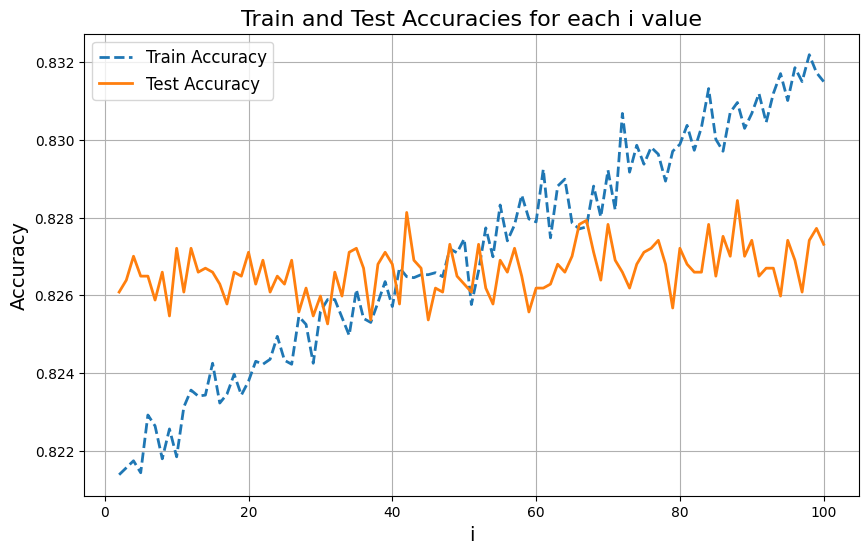

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))


# Plot the train and test accuracies for each i value with increased line width and different line style
plt.plot(i_values, train_accuracies, label='Train Accuracy', linewidth=2, linestyle='--')
plt.plot(i_values, test_accuracies, label='Test Accuracy', linewidth=2, linestyle='-')

# Set the title, x-label, and y-label
plt.title('Train and Test Accuracies for each i value', fontsize=16)
plt.xlabel('i', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

**Question:** Analyze the results.

**Your Answer:**
Altering the quantity of sections didn't significantly affect the models' performance.